In [3]:
# Import the modules needed for this project.
import bs4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from time import sleep
from bs4 import BeautifulSoup
%matplotlib inline

In [3]:
#I will search for job titles chosen from the article "The Best Data Jobs in 2017" from data-informed.com:
jobs = ['statistician', 'market+analyst', 'information+security_analyst', 'database+administrator',
        'analytics+manager', 'data+scientist', 'data+science']

In [4]:
# I will search in cities chosen from the article "The 20 Best Cities In The U.S. And Canada For Tech Workers In 2016"
# from Forbes.com:
cities = ['Atlanta,+GA', 'Newark,+NJ', 'Denver,+CO', 'Detroit,+MI', 'San+Diego,+CA', 'Minneapolis,+MN',
          'Orange+County,+CA', 'Chicago,+IL', 'Phoenix,+AZ', 'Baltimore,+MD', 'Raleigh-Durham,+NC', 'Boston,+MA',
          'Dallas-Fort+Worth,+TX', 'Austin,+TX', 'New+York,+NY', 'Seattle,+WA', 'Washington,+DC', 'San+Francisco,+CA']

In [4]:
# Set up database where results will be added:
columns = ['location', 'company', 'job', 'salary']
df = pd.DataFrame(columns=columns)

In [5]:
# Iterate through jobs, cities, and pages on Indeed, after adjusting number of jobs per page to 50, to speed up search.
# Add results of each iteration to a list.

rawsoup = []
for job in jobs:
    for city in cities:
        for start in range(0,301,50):
            url = "https://www.indeed.com/jobs?q="+job+"&limit=50&l="+city+"&start="+str(start)
            response = requests.get(url)
            html = response.text
            soup = BeautifulSoup(html,'lxml')
            for posting in soup.find_all('div', attrs={'class':' row result'}):
                rawsoup.append(posting)
            sleep(1)

In [6]:
# Iterate through list of rawsoup, add location, company, job and salary to database:
for i in rawsoup:
    try:
        loc = i.find('span', attrs={'class':'location'}).text
    except:
        loc = 'NA'
    try:
        com = i.find('span', attrs={'class':'company'}).text.strip()
    except:
        com = 'NA'
    try:
        pos = i.find('a', attrs={'data-tn-element':'jobTitle'}).text
    except:
        pos = 'NA'
    try:
        sal = i.find('span', attrs={'class':'no-wrap'}).text
    except:
        sal = 'NA'
    df = df.append({'location':loc, 'company':com, 'job':pos, 'salary':sal}, ignore_index=True)

In [7]:
df.head()

,location,company,job,salary
0,"Atlanta, GA",ICF,Scientific Data Analyst,NA
1,"Atlanta, GA",The Hexagon Lavish,Data Scientist I,NA
2,"Atlanta, GA 30329",SciMetrika,Statistician,NA
3,"Atlanta, GA",Equifax,Statistician - Risk Analytics,NA
4,"Atlanta, GA",Northrop Grumman,Health Research Analyst,NA


In [8]:
df.shape

(38124, 4)

In [9]:
df.describe()

,location,company,job,salary
count,38124,38124,38124,38124
unique,1642,8269,16546,991
top,"New York, NY",Amazon Corporate LLC,Data Scientist,NA
freq,1897,550,783,34848


In [10]:
df.salary.unique()

array(['NA', u'$90,000 - $120,000 a year', u'$134,800 a year',
       u'$75,000 a year', u'$70 an hour', u'$42,288 - $63,519 a year',
       u'$60 - $90 an hour', u'$110,000 - $135,000 a year', u'$80 an hour',
       u'$100,000 - $140,000 a year', u'$105,000 - $125,000 a year',
       u'$140,000 - $160,000 a year', u'$70,286 - $80,829 a year',
       u'$75,000 - $100,000 a year', u'$138,000 a year',
       u'$80,000 - $95,000 a year', u'$160,000 a year',
       u'$85,000 - $130,000 a year', u'$75 an hour', u'$65 an hour',
       u'$36,557 - $47,063 a year', u'$55,000 - $68,721 a year',
       u'$15.47 - $21.26 an hour', u'$37,040 - $50,932 a year',
       u'$68,586 - $85,464 a year', u'$85 - $100 an hour',
       u'$70 - $100 an hour', u'$100,000 - $150,000 a year',
       u'$105,000 - $130,000 a year', u'$100,000 - $110,000 a year',
       u'$65 - $75 an hour', u'$150,000 a year', u'$120,000 a year',
       u'$100,000 a year', u'$90,000 a year', u'$70,000 - $80,000 a year',
       u'$

In [11]:
# Next, I need to pull from this database only those unique entries with salary information.
df2=pd.DataFrame()
df2 = df[df['salary']!='NA']

In [12]:
df2.shape

(3276, 4)

In [13]:
df2.head()

,location,company,job,salary
18,"Atlanta, GA",Smith Hanley Associates,Statistician - Model Validation,"$90,000 - $120,000 a year"
25,"Atlanta, GA",All-In Analytics,Director of Analytic Solutions,"$134,800 a year"
46,"Atlanta, GA",Smith Hanley Associates,Statistician - Model Validation,"$90,000 - $120,000 a year"
51,"Atlanta, GA",All-In Analytics,Director of Analytic Solutions,"$134,800 a year"
73,"Atlanta, GA",Smith Hanley Associates,Statistician - Model Validation,"$90,000 - $120,000 a year"


In [14]:
# Since it appears there are duplicate entries, I need to remove them.

In [15]:
dfjobs=pd.DataFrame()
dfjobs=df2.drop_duplicates()

In [16]:
dfjobs.shape

(1992, 4)

In [17]:
# Create column for numerical equivalents to compare pay for jobs.
dfjobs['salval'] = 0

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
dfjobs.head()

,location,company,job,salary,salval
18,"Atlanta, GA",Smith Hanley Associates,Statistician - Model Validation,"$90,000 - $120,000 a year",0
25,"Atlanta, GA",All-In Analytics,Director of Analytic Solutions,"$134,800 a year",0
196,"Edison, NJ",Sollers,Data Analyst,"$75,000 a year",0
202,"Franklin Lakes, NJ",On-Board Services,Statistician 2,$70 an hour,0
205,"New York, NY",POLICE DEPARTMENT,"Statistician, Level I","$42,288 - $63,519 a year",0


In [20]:
# Next, I will loop through all the salary entries and turn them into numerical equivalents of one year's salary.
sal_equiv=[]
periods = [('an hour',2000), ('a day',250), ('a week',52), ('a month',12), ('a year',1)]
for i in dfjobs['salary']:
    # Changes type from unicode to string
    i=str(i)
    for period,multiplier in periods:
        if period in i:
            x = i.replace('$','').replace(',','').replace(period,'')
            if '-' in x:
                xx = x.split('-')
                yy = np.mean([float(xxx) for xxx in xx])
                y = round((float(yy)*multiplier),0)
            else:
                y = round((float(x)*multiplier),0)
            sal_equiv.append(y)

In [72]:
### My original kinda ugly code! (I couldn't stand to delete it - we became close on Saturday!)
# # Next, I will loop through all the salary entries and turn them into numerical equivalents of one year's salary.
# sal_equiv=[]
# for i in dfjobs['salary']:
#     # Changes type from unicode to string
#     i=str(i)
#     if 'an hour' in i:
#         x = i.replace('$','').replace(',','').replace('an hour','')
#         if '-' in x:
#             xx = x.split('-')
#             yy = np.mean([float(xxx) for xxx in xx])
#             y = round((float(yy)*40*50),0)
#         else:
#             y = round((float(x)*40*50),0)
#         sal_equiv.append(y)
#     elif 'a day' in i:
#         x = i.replace('$','').replace(',','').replace('a day','')
#         if '-' in x:
#             xx = x.split('-')
#             yy = np.mean([float(xxx) for xxx in xx])
#             y = round((float(yy)*5*50),0)
#         else:
#             y = round((float(x)*5*50),0)
#         sal_equiv.append(y)
#     elif 'a week' in i:
#         x = i.replace('$','').replace(',','').replace('a week','')
#         if '-' in x:
#             xx = x.split('-')
#             yy = np.mean([float(xxx) for xxx in xx])
#             y = round((float(yy)*50),0)
#         else:
#             y = round((float(x)*50),0)
#         sal_equiv.append(y)
#     elif 'a month' in i:
#         x = i.replace('$','').replace(',','').replace('a month','')
#         if '-' in x:
#             xx = x.split('-')
#             yy = np.mean([float(xxx) for xxx in xx])
#             y = round((float(yy)*12),0)
#         else:
#             y = round((float(x)*12),0)
#         sal_equiv.append(y)
#     elif 'a year' in i:
#         x = i.replace('$','').replace(',','').replace('a year','')
#         if '-' in x:
#             xx = x.split('-')
#             yy = np.mean([float(xxx) for xxx in xx])
#             y = round((float(yy)),0)
#         else:
#             y = round((float(x)))
#         sal_equiv.append(y)
#     else:
#         sal_equiv.append(i)

In [21]:
dfjobs['salval'] = sal_equiv

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
dfjobs.head()

,location,company,job,salary,salval
18,"Atlanta, GA",Smith Hanley Associates,Statistician - Model Validation,"$90,000 - $120,000 a year",105000.0
25,"Atlanta, GA",All-In Analytics,Director of Analytic Solutions,"$134,800 a year",134800.0
196,"Edison, NJ",Sollers,Data Analyst,"$75,000 a year",75000.0
202,"Franklin Lakes, NJ",On-Board Services,Statistician 2,$70 an hour,140000.0
205,"New York, NY",POLICE DEPARTMENT,"Statistician, Level I","$42,288 - $63,519 a year",52904.0


In [23]:
dfjobs.shape

(1992, 5)

In [24]:
# In order to determine "high" or "low" salaries, we will create two columns, High (1) / Low (0), and also a column
# for quartlies (1,2,3 or 4 depending on which quartile the data is in.)

# Calculate median salary:
mediansal = np.median(dfjobs['salval'])
lowperc = np.percentile(dfjobs['salval'],25)
highperc = np.percentile(dfjobs['salval'],75)
print '25% percentile :', lowperc
print 'Median salary :', mediansal
print '75% percentile :', highperc

25% percentile : 53744.5
Median salary : 77025.0
75% percentile : 102512.0


In [25]:
dfjobs['high_low'] = [1 if i >= mediansal else 0 for i in dfjobs['salval']]


/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
dfjobs['quart'] = [4 if i >= highperc else 3 if i >= mediansal else 2 if i >= lowperc else 1 for i in dfjobs['salval']]

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
dfjobs.head()

,location,company,job,salary,salval,high_low,quart
18,"Atlanta, GA",Smith Hanley Associates,Statistician - Model Validation,"$90,000 - $120,000 a year",105000.0,1,4
25,"Atlanta, GA",All-In Analytics,Director of Analytic Solutions,"$134,800 a year",134800.0,1,4
196,"Edison, NJ",Sollers,Data Analyst,"$75,000 a year",75000.0,0,2
202,"Franklin Lakes, NJ",On-Board Services,Statistician 2,$70 an hour,140000.0,1,4
205,"New York, NY",POLICE DEPARTMENT,"Statistician, Level I","$42,288 - $63,519 a year",52904.0,0,1


In [29]:
# Need to eliminate anything other than city and state in location column
citystlist=[]
for i in dfjobs['location']:
    loclist=i.split(',')
    new=loclist[0]+','+loclist[1][0:3]
    citystlist.append(new)
dfjobs['location'] = citystlist

/Users/jonvanwieren/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
# The baseline accuracy for this model is .5, the mean of the high_low column.
np.mean(dfjobs['high_low'])

0.5030120481927711

In [31]:
# Save data in csv file 
dfjobs.to_csv('./data/dfjobs_csv.csv', index=False, encoding='utf-8')

In [2]:
# Load up the modules I will need for my modeling.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Load data from csv file
dfjobs=pd.read_csv('./data/dfjobs_csv.csv')

In [4]:
# Create list of top 20 cities for graphing
top20city=dfjobs.location.value_counts().head(20)
citygraph=top20city.index.tolist()

In [5]:
dfjobs20=dfjobs[dfjobs['location'].isin(citygraph)]

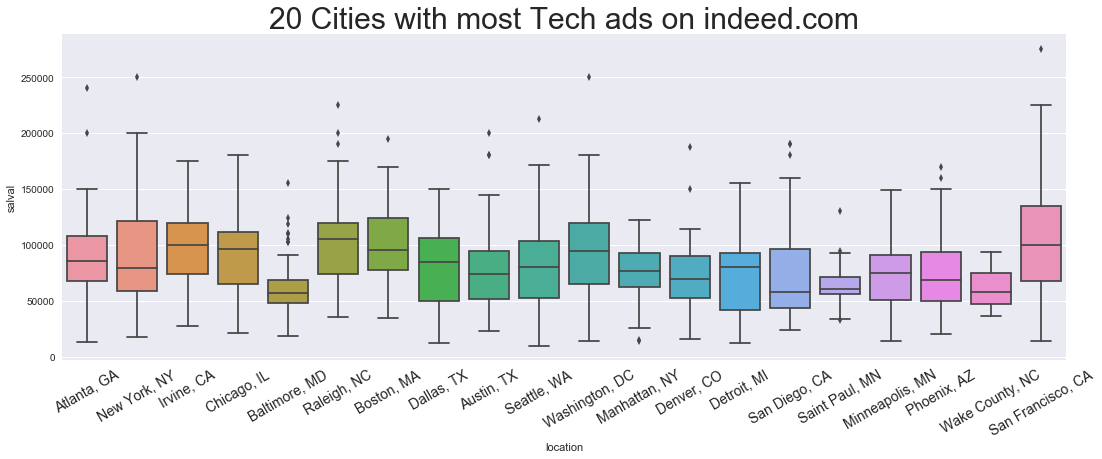

In [6]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(x="location", y="salval", data=dfjobs20)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_title('20 Cities with most Tech ads on indeed.com', fontsize=30)
plt.show()

In [21]:
dfmean=dfjobs20.groupby(['location'])['salval'].mean()
dfmeandb=pd.DataFrame(dfmean)
dfmeandb.sort_values('salval',ascending=False)

,salval
location,
"San Francisco, CA",104692.836066
"Raleigh, NC",99877.650000
"Boston, MA",99148.825000
"Washington, DC",97854.826923
"Irvine, CA",97696.466667
"Chicago, IL",92801.469388
"New York, NY",92250.500000
"Atlanta, GA",88653.177570
"Seattle, WA",83419.079365


In [11]:
# MODEL #1: DECISION TREE CLASSIFIER on location
# Before running the random forest, I want to run a single Decision Tree to see visually how the model is working.

y = dfjobs['high_low']
X = pd.get_dummies(dfjobs['location'])
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=50)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
scores = cross_val_score(dt,X,y,cv=10)
print 'Cross-val score: ',np.mean(scores)

Cross-val score:  0.484954773869


In [13]:
fe_im = pd.DataFrame(dt.feature_importances_,
                                  index=X.columns,
                                  columns=['importance'])
fe_im.sort_values(by='importance', ascending=False).head()

,importance
"Baltimore, MD",0.437150
"Boston, MA",0.329046
"Raleigh, NC",0.233805
"Peoria, AZ",0.000000
"Pomona, CA",0.000000


In [5]:
# MODEL #2: RANDOM FOREST CLASSIFIER on location only

y = dfjobs['high_low']
X = pd.get_dummies(dfjobs['location'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train,y_train)

scores = cross_val_score(rfc,X_train,y_train,cv=10)
print 'Cross-val score: ',np.mean(scores)

Cross-val score:  0.629163310962


In [6]:
rfc_pr = rfc.predict(X_test)
score = accuracy_score(y_test, rfc_pr)
print 'Accuracy score: ',score

Accuracy score:  0.66265060241


In [7]:
fe_im = pd.DataFrame(rfc.feature_importances_,
                                  index=X.columns,
                                  columns=['importance'])
fe_im.sort_values(by='importance', ascending=False).head()

,importance
"Baltimore, MD",0.045433
"Chicago, IL",0.042007
"Boston, MA",0.028346
"Raleigh, NC",0.028087
"Fort Meade, MD",0.024895


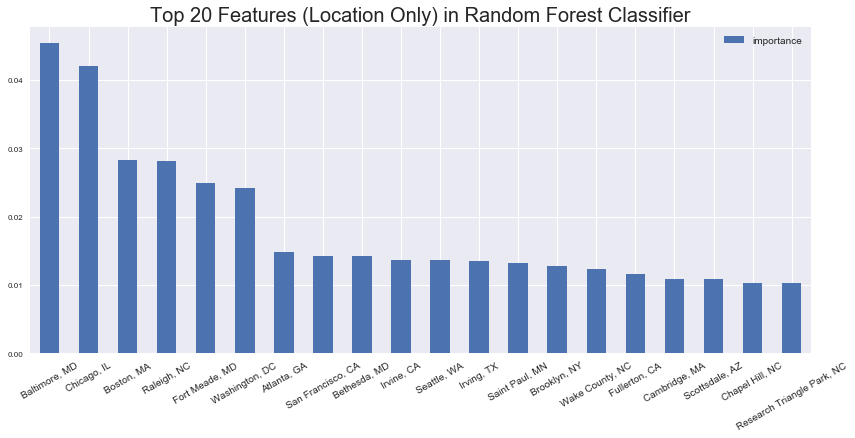

In [8]:
fig, ax = plt.subplots(figsize=(14,6))
fe_im.sort_values(by='importance',ascending=False).head(20).plot(kind='bar', ax=ax, fontsize=8)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
ax.set_title('Top 20 Features (Location Only) in Random Forest Classifier',fontsize=20)
plt.show()

In [9]:
# MODEL #3: RANDOM FOREST CLASSIFIER on location only (tried different Fibonacci n_estimator amounts)
# Loop through different n_estimators

y = dfjobs['high_low']
X = pd.get_dummies(dfjobs['location'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25)

for fib in [1,2,3,5,8,13,21,34,55,89,144]:
    rfc = RandomForestClassifier(n_estimators=fib, n_jobs=-1)
    rfc.fit(X_train,y_train)
    scores = cross_val_score(rfc,X_train,y_train,cv=10)
    print 'n_estimators =',fib
    print 'Cross-val score: ',np.mean(scores)

    rfc_pr = rfc.predict(X_test)
    score = accuracy_score(y_test, rfc_pr)
    print 'Accuracy score: ',score    
    print ''

n_estimators = 1
Cross-val score:  0.627840921458
Accuracy score:  0.576305220884

n_estimators = 2
Cross-val score:  0.608471793942
Accuracy score:  0.620481927711

n_estimators = 3
Cross-val score:  0.627863655602
Accuracy score:  0.622489959839

n_estimators = 5
Cross-val score:  0.626494225769
Accuracy score:  0.650602409639

n_estimators = 8
Cross-val score:  0.629877078421
Accuracy score:  0.656626506024

n_estimators = 13
Cross-val score:  0.625858939476
Accuracy score:  0.632530120482

n_estimators = 21
Cross-val score:  0.631863595139
Accuracy score:  0.66265060241

n_estimators = 34
Cross-val score:  0.628525606143
Accuracy score:  0.66265060241

n_estimators = 55
Cross-val score:  0.625169901445
Accuracy score:  0.656626506024

n_estimators = 89
Cross-val score:  0.63255263317
Accuracy score:  0.658634538153

n_estimators = 144
Cross-val score:  0.628516597134
Accuracy score:  0.660642570281



In [5]:
# Adding features to see if "scientist" or "analyst" had effect on predicting salary.

dfjobs['scientist'] = [1 if 'scientist' in i else 1 if 'Scientist' in i else 0 for i in dfjobs['job']]
dfjobs['analyst'] = [1 if 'analyst' in j else 1 if 'Analyst' in j else 0 for j in dfjobs['job']]

In [17]:
# MODEL #4: RANDOM FOREST CLASSIFIER on location plus "scientist" and "analyst" as key word variables.
# Ran RFC again after adding 'scientist' and 'analyst' as separate variables to test.
y = dfjobs['high_low']
dummies = pd.get_dummies(dfjobs[['location']],drop_first=True)
dfjobs = dfjobs.merge(dummies,left_index=True, right_index=True,how='outer')
X = dfjobs.drop(['location','company','job','salary','salval','high_low','quart'], axis=1)
              
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train,y_train)

scores = cross_val_score(rfc,X_train,y_train,cv=10)
print 'Cross-val score: ',np.mean(scores)

Cross-val score:  0.62146440371


In [18]:
rfc_pr = rfc.predict(X_test)
score = accuracy_score(y_test, rfc_pr)
print 'Accuracy score: ',score

Accuracy score:  0.651629072682


In [17]:
fe_im = pd.DataFrame(rfc.feature_importances_,
                                  index=X.columns,
                                  columns=['importance'])
fe_im.sort_values(by='importance', ascending=False).head()

,importance
analyst,0.068542
scientist,0.038381
"location_Baltimore, MD",0.037121
"location_Boston, MA",0.031897
"location_San Francisco, CA",0.022559


In [19]:
# MODEL #5: RANDOM FOREST CLASSIFIER on location, company and job plus "scientist" and "analyst" as key word variables.
# Added dummy variables on company and job title as well.
y = dfjobs['high_low']
dummies = pd.get_dummies(dfjobs[['location','company','job']],drop_first=True)
dfjobs = dfjobs.merge(dummies,left_index=True, right_index=True,how='outer')
X = dfjobs.drop(['location','company','job','salary','salval','high_low','quart'], axis=1)
       
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train,y_train)

scores = cross_val_score(rfc,X_train,y_train,cv=10)
print 'Cross-val score: ',np.mean(scores)

Cross-val score:  0.652587403885


In [20]:
rfc_pr = rfc.predict(X_test)
score = accuracy_score(y_test, rfc_pr)
print 'Accuracy score: ',score

Accuracy score:  0.660642570281


In [21]:
fe_im = pd.DataFrame(rfc.feature_importances_,
                                  index=X.columns,
                                  columns=['importance'])
fe_im.sort_values(by='importance', ascending=False).head()

,importance
analyst,0.018066
scientist,0.012558
company_Liberty Mutual,0.008785
company_Veredus,0.006915
company_Workbridge Associates,0.005712


In [22]:
# MODEL #6: RANDOM FOREST CLASSIFIER on location, company and job plus "scientist" and "analyst" vs QUARTILE.
# Going to try quartile data instead of high/low
y = dfjobs['quart']
dummies = pd.get_dummies(dfjobs[['location','company','job']],drop_first=True)
dfjobs = dfjobs.merge(dummies,left_index=True, right_index=True,how='outer')
X = dfjobs.drop(['location','company','job','salary','salval','high_low','quart'], axis=1)
                 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train,y_train)

scores = cross_val_score(rfc,X_train,y_train,cv=10)
print 'Cross-val score: ',np.mean(scores)

Cross-val score:  0.451108037234


In [23]:
rfc_pr = rfc.predict(X_test)
score = accuracy_score(y_test, rfc_pr)
print 'Accuracy score: ',score

Accuracy score:  0.429718875502


In [24]:
fe_im = pd.DataFrame(rfc.feature_importances_,
                                  index=X.columns,
                                  columns=['importance'])
fe_im.sort_values(by='importance', ascending=False).head()

,importance
analyst,0.023039
scientist,0.006546
job_Data Scientist_x,0.003432
company_Liberty Mutual_x,0.002825
job_Data Scientist_y,0.002661


In [27]:
# MODEL #7: RANDOM FOREST CLASSIFIER on location, company and job plus "scientist" and "analyst" vs QUARTILE.
# Since 'analyst' and 'scientist' continued to show up as important features, decided to run Count Vectorizer on job
# title.

y = dfjobs['high_low']
X = dfjobs['job']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',ngram_range=(1,2))
cv.fit(X)
XX=pd.DataFrame(cv.transform(X).todense(), columns=cv.get_feature_names())
                 
X_train, X_test, y_train, y_test = train_test_split(XX,y, test_size=.25)

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train,y_train)

scores = cross_val_score(rfc,X_train,y_train,cv=10)
print 'Cross-val score: ',np.mean(scores)

Cross-val score:  0.756238055025


In [28]:
rfc_pr = rfc.predict(X_test)
score = accuracy_score(y_test, rfc_pr)
print 'Accuracy score: ',score

Accuracy score:  0.738955823293


In [30]:
fe_im = pd.DataFrame(rfc.feature_importances_,
                                  index=XX.columns,
                                  columns=['importance'])
fe_im.sort_values(by='importance', ascending=False).head()

meansalvec=[]
highlowvec=[]
for jobword in XX.columns:
    meansalvec.append(np.mean(dfjobs[dfjobs['job'].str.contains(jobword)].salval))
    highlowvec.append(np.mean(dfjobs[dfjobs['job'].str.contains(jobword)].high_low))
fe_im['mean_salary']=meansalvec
fe_im['high_or_low_salary']=highlowvec    

In [31]:
fe_im.sort_values(by='importance', ascending=False).head(10)

,importance,mean_salary,high_or_low_salary
engineer,0.022962,130000.0,1.00
specialist,0.020878,NaN,NaN
senior,0.020780,NaN,NaN
developer,0.010987,77000.0,0.50
research,0.010521,NaN,NaN
architect,0.010085,NaN,NaN
data scientist,0.009093,NaN,NaN
data,0.008988,87500.0,0.75
sr,0.008669,NaN,NaN
analytics,0.008284,NaN,NaN


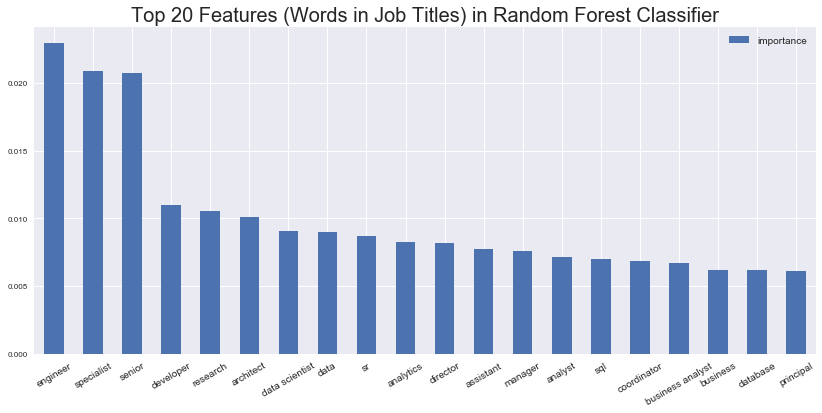

In [32]:
fe_im2=fe_im.iloc[:,0:1]
fig, ax = plt.subplots(figsize=(14,6))
fe_im2.sort_values(by='importance',ascending=False).head(20).plot(kind='bar', ax=ax, fontsize=8)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
ax.set_title('Top 20 Features (Words in Job Titles) in Random Forest Classifier',fontsize=20)
plt.show()